In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv('C:/Users/HP/Desktop/100 Days Machine learning/Csv.files/train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [9]:
df['Family'] = df['SibSp']+df['Parch']
df.drop(columns=['SibSp','Parch'],inplace=True)


In [11]:
df.head()

Age     Fare  Survived  Family
0  22.0   7.2500         0       1
1  38.0  71.2833         1       1
2  26.0   7.9250         1       0
3  35.0  53.1000         1       1
4  35.0   8.0500         0       0

In [13]:
df.isnull().mean()


Age         0.198653
Fare        0.004489
Survived    0.000000
Family      0.000000
dtype: float64

In [15]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [19]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [23]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())


Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2377.2723731826773
Fare Variance after 999 wala imputation:  7591.392476388037
Fare Variance after -1 wala imputation:  2370.1154666375537


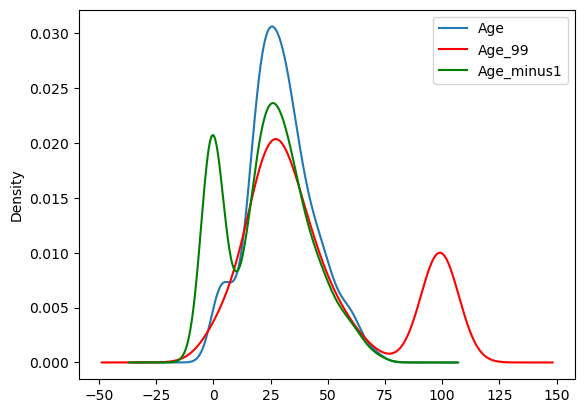

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

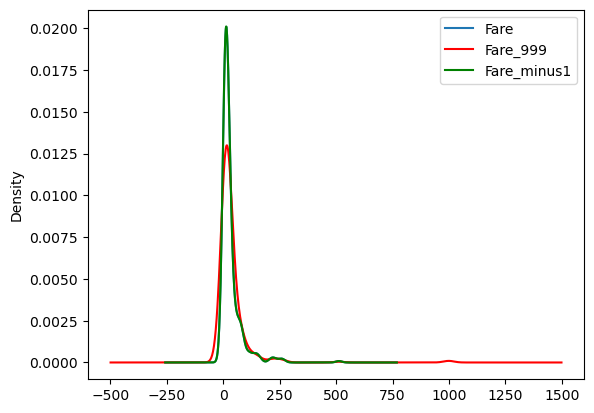

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [29]:
X_train.cov()


Age         Fare     Family      Age_99  Age_minus1  \
Age          204.349513    71.644209  -6.498901  204.349513  204.349513   
Fare          71.644209  2377.272373  16.370920 -103.676722  128.265281   
Family        -6.498901    16.370920   2.735252   -7.387287   -4.149246   
Age_99       204.349513  -103.676722  -7.387287  951.727557 -189.535540   
Age_minus1   204.349513   128.265281  -4.149246 -189.535540  318.089620   
Fare_999      66.987272  2377.272373  24.802939    3.372121   75.136761   
Fare_minus1   71.555316  2377.272373  15.984848 -106.765129  129.351034   

                Fare_999  Fare_minus1  
Age            66.987272    71.555316  
Fare         2377.272373  2377.272373  
Family         24.802939    15.984848  
Age_99          3.372121  -106.765129  
Age_minus1     75.136761   129.351034  
Fare_999     7591.392476  2183.617481  
Fare_minus1  2183.617481  2370.115467

In [31]:
X_train.corr()


Age      Fare    Family    Age_99  Age_minus1  Fare_999  \
Age          1.000000  0.095695 -0.299113  1.000000    1.000000  0.060440   
Fare         0.095695  1.000000  0.207014 -0.069065    0.147492  1.000000   
Family      -0.299113  0.207014  1.000000 -0.144787   -0.140668  0.172125   
Age_99       1.000000 -0.069065 -0.144787  1.000000   -0.344476  0.001255   
Age_minus1   1.000000  0.147492 -0.140668 -0.344476    1.000000  0.048352   
Fare_999     0.060440  1.000000  0.172125  0.001255    0.048352  1.000000   
Fare_minus1  0.095834  1.000000  0.198530 -0.071087    0.148974  0.514791   

             Fare_minus1  
Age             0.095834  
Fare            1.000000  
Family          0.198530  
Age_99         -0.071087  
Age_minus1      0.148974  
Fare_999        0.514791  
Fare_minus1     1.000000

# Using Sklearn


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [36]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [38]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [40]:
trf.fit(X_train)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [42]:
trf.named_transformers_['imputer1'].statistics_


array([99.])

In [44]:
trf.named_transformers_['imputer2'].statistics_


array([999.])

In [46]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [48]:
X_train


array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])